In [1]:
import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')
print(df.shape)
print(df.dtypes)
df.head()

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
print(df.isnull().sum())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.describe(include='all').T
#The dataset has 7043 entries. Most features are categorical. 
#TotalCharges had some missing values due to non-numeric entries, which were converted using pd.to_numeric.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

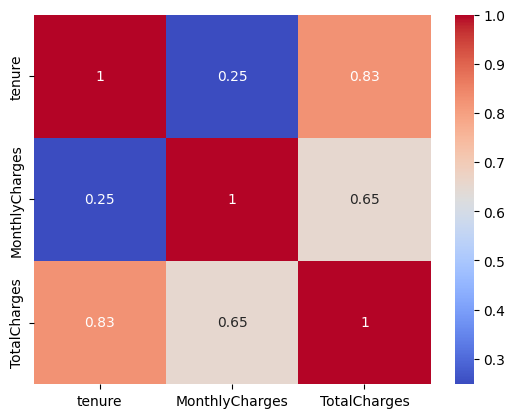

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Churn') #Shows the distribution of Churn (whether a customer has churned). Most customers did not churn.
sns.boxplot(data=df, x='Churn', y='MonthlyCharges') #The median monthly charge is higher for churned customers, 
                                                    #suggesting that higher charges may be associated with churn.
df_numeric = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
#tenure and TotalCharges have high correlation (0.83)
#Indicates: the longer the service duration, the higher the total charge; 
#customers with higher monthly charges may be more likely to churn.

In [4]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [5]:
df.drop('customerID', axis=1, inplace=True)

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [8]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Churn_Yes', axis=1)  
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X = df_encoded
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [10]:
#test the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

X = df_encoded.drop(columns=['Churn_Yes'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC Score: 0.8319235288940887


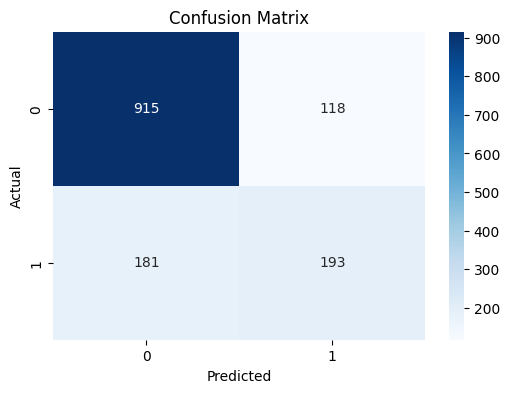

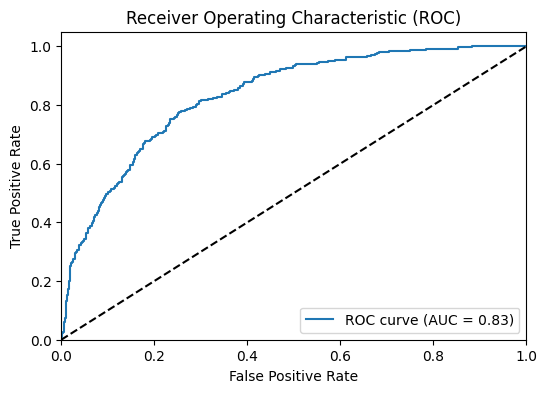

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [13]:
# test the random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("🔍 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_prob_rf))


🔍 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

AUC Score: 0.813957581624571


In [14]:
#Compare to the Logistic Regression Random Forest, from the results, we can see the logistic regression model is better

In [12]:
# Import the library 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

In [13]:
#Initialize the tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# max_depth=5: limits the maximum depth of the tree to prevent overfitting
# random_state=42: ensures results are reproducible

In [14]:
tree_model.fit(X_train_scaled, y_train)

# fit(): fits the model parameters to the training data

DecisionTreeClassifier(max_depth=5, random_state=42)

In [15]:
# Predict on test set
y_pred_tree = tree_model.predict(X_test_scaled)
y_prob_tree = tree_model.predict_proba(X_test_scaled)[:, 1]

In [16]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_tree)) 
print("Decision tree classification report：")
print(classification_report(y_test, y_pred_tree))
print("Confusion_matrix：")
print(confusion_matrix(y_test, y_pred_tree))
print("Roc auc score：", roc_auc_score(y_test, y_prob_tree))

Accuracy: 0.775408670931059
Decision tree classification report：
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407

Confusion_matrix：
[[870 163]
 [153 221]]
Roc auc score： 0.8129662319913445


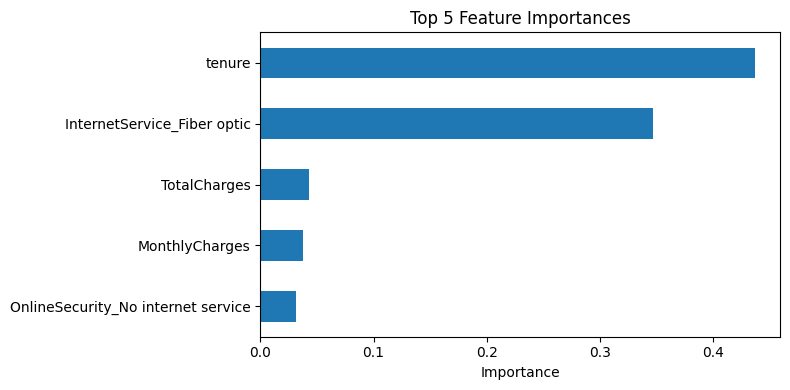

In [17]:
# bar chart of top 5 features
feat_imp = pd.Series(
    tree_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
feat_imp.iloc[:5] \
    .sort_values() \
    .plot(kind='barh')

plt.title("Top 5 Feature Importances")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

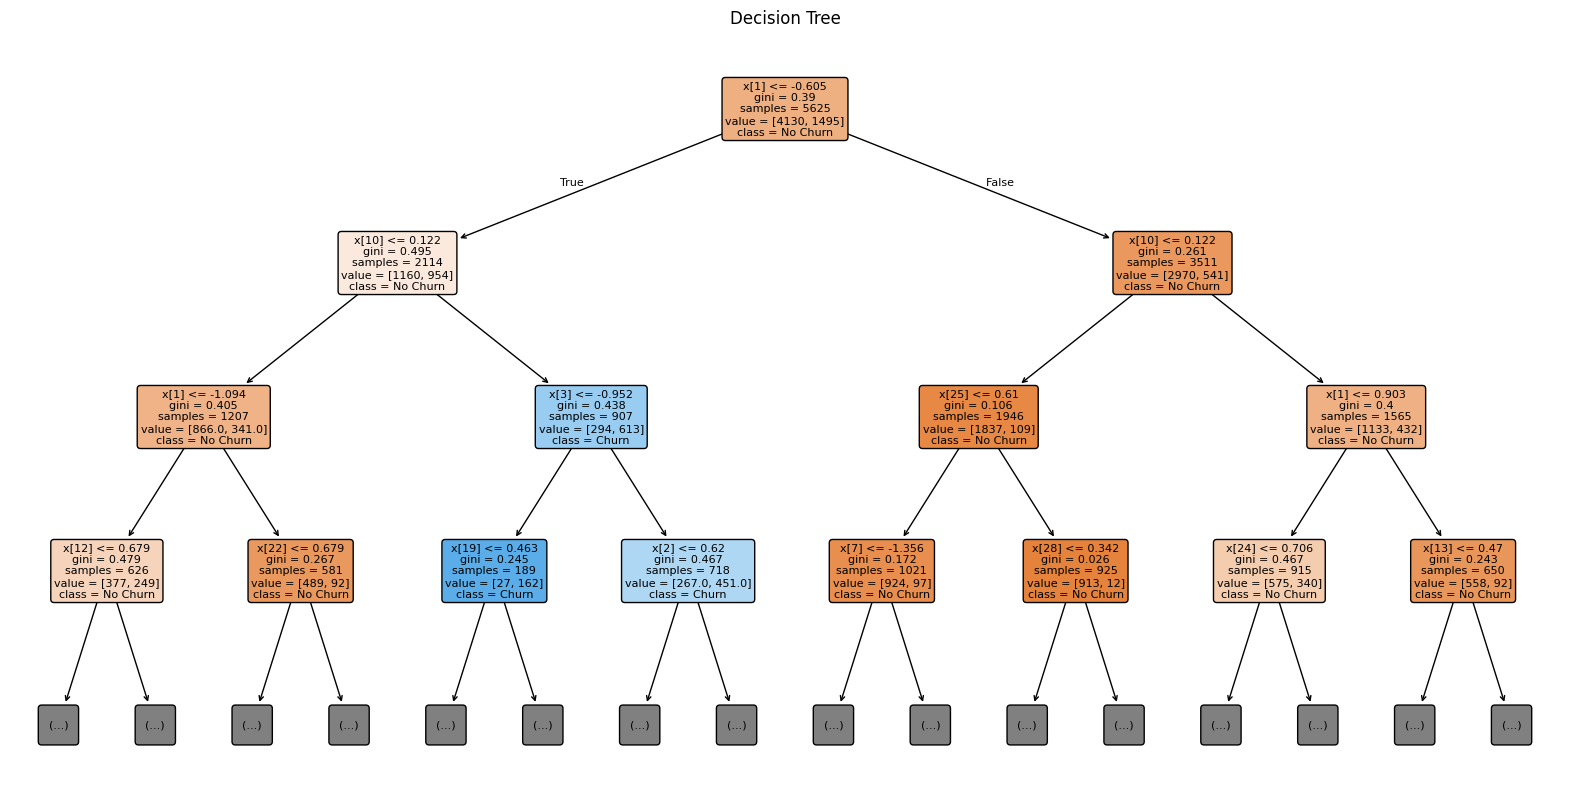

In [18]:
# Visualizing the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=(X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else None),
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=8
)
plt.title("Decision Tree")
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, roc_curve, precision_recall_curve, 
                            auc)
from sklearn.inspection import permutation_importance

In [20]:
# Load data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [21]:
# Data preprocessing
# Convert TotalCharges to numeric, handle blank values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [22]:
# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [23]:
# Define features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [24]:
# Identify feature types
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

In [25]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [26]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [27]:
# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [28]:
# Get feature names
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + cat_feature_names.tolist()

In [29]:
# Train SVM model
svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train_preprocessed, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [30]:
# Predict
y_pred = svm.predict(X_test_preprocessed)
y_proba = svm.predict_proba(X_test_preprocessed)[:, 1]

In [31]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

ROC-AUC Score: 0.8237470597423598


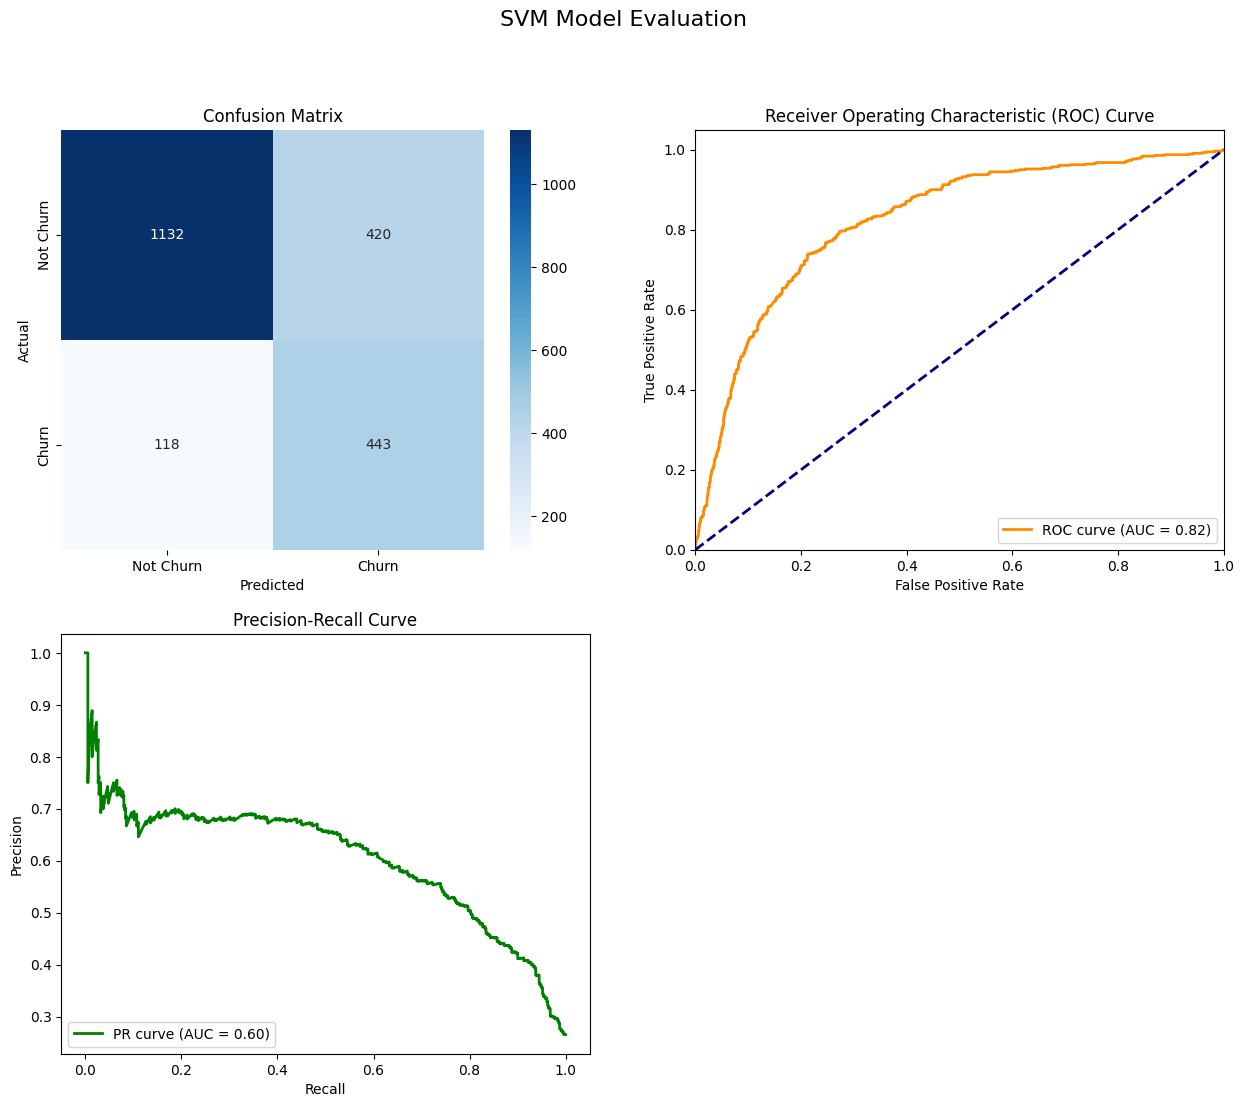

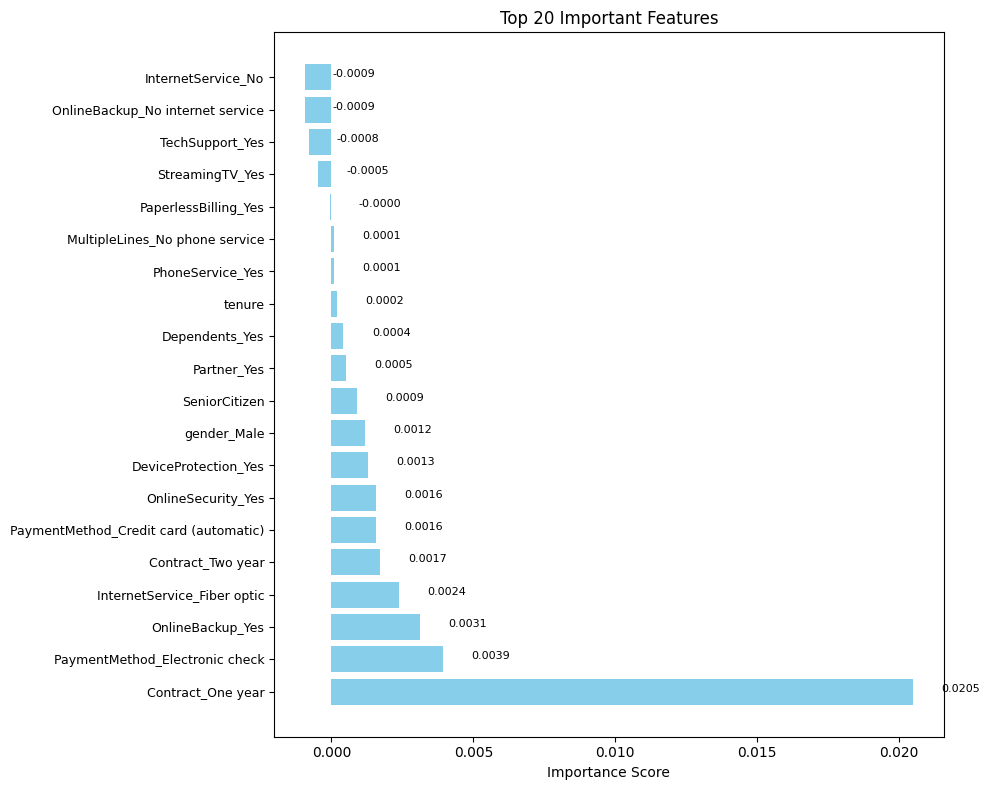

In [32]:
plt.figure(figsize=(15, 12))
plt.suptitle('SVM Model Evaluation', fontsize=16)

# 1. Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 2. ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 3. Precision-Recall Curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# 4. Feature Importance (Permutation Importance)
result = permutation_importance(
    svm, X_test_preprocessed, y_test, n_repeats=10, random_state=42
)
# Get top 20 most important features
sorted_idx = result.importances_mean.argsort()[-20:]
top_features = np.array(feature_names)[sorted_idx]
top_importances = result.importances_mean[sorted_idx]
# Create plot with better spacing
fig, ax = plt.subplots(figsize=(10, 8))
y_pos = np.arange(len(top_features))
ax.barh(y_pos, top_importances, align='center', color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_features, fontsize=9)  # Slightly smaller font
ax.invert_yaxis()  # Most important at top
ax.set_xlabel('Importance Score')
ax.set_title('Top 20 Important Features')
# Add importance values at end of bars
for i, v in enumerate(top_importances):
    ax.text(v + 0.001, i, f"{v:.4f}", color='black', fontsize=8)
plt.tight_layout()

In [33]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from functools import partial
from dotenv import load_dotenv
from pathlib import Path
env_path = Path("ATT01786.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

envs Loaded
Pinged your deployment. You successfully connected to MongoDB!
